In [23]:
import pandas as pd

df = pd.read_csv("UK_Accident.csv")      # full dataset from https://www.kaggle.com/datasets/devansodariya/road-accident-united-kingdom-uk-dataset
df_first20k = df.iloc[:100_000]                # slice out the first 100 000 rows as original "UK_Accident.csv" has > 1M entries
# or equivalently:
# df_first20k = df.head(100_000)

df_first20k.to_csv("first_100k_rows_UK_Accident.csv", index=False)

In [25]:
#import pandas as pd
# Provide details of your dataset. For example, the number of rows,
# number of columns, name, and type of each attribute.

# Load the all rows of the dataset
df = pd.read_csv("UK_Accident.csv")

# Prepare summary of columns and data types
schema_df = pd.DataFrame({
    'Attribute Name': df.columns,
    'Data Type': df.dtypes.astype(str)
})
# display(schema_df)

# Display the schema to the user
#!pip install pandas ace_tools
# import ace_tools as tools
from IPython.display import display

# tools.display_dataframe_to_user(name="Dataset Schema and Types", dataframe=schema_df)

# Also, print the overall shape
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.info()  # prints names, non-null counts, and dtypes summary


Dataset shape: 1504150 rows, 33 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number

In [27]:
#import pandas as pd
# Provide details of your dataset. For example, the number of rows,
# number of columns, name, and type of each attribute.

# Load the first 100k rows of the dataset
df = pd.read_csv('first_100k_rows_UK_Accident.csv')

# Prepare summary of columns and data types
schema_df = pd.DataFrame({
    'Attribute Name': df.columns,
    'Data Type': df.dtypes.astype(str)
})
# display(schema_df)

# Display the schema to the user
#!pip install pandas ace_tools
# import ace_tools as tools
from IPython.display import display

# tools.display_dataframe_to_user(name="Dataset Schema and Types", dataframe=schema_df)

# Also, print the overall shape
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.info()  # prints names, non-null counts, and dtypes summary

Dataset shape: 100000 rows, 33 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Unnamed: 0                                   100000 non-null  int64  
 1   Accident_Index                               100000 non-null  object 
 2   Location_Easting_OSGR                        99969 non-null   float64
 3   Location_Northing_OSGR                       100000 non-null  float64
 4   Longitude                                    99969 non-null   float64
 5   Latitude                                     100000 non-null  float64
 6   Police_Force                                 100000 non-null  int64  
 7   Accident_Severity                            100000 non-null  int64  
 8   Number_of_Vehicles                           100000 non-null  int64  
 9   Number_of_Casualties 

In [ ]:
# Data cleaning

In [29]:
# 1. Missing-Value Handling

# Load the first 100k rows of the dataset
df = pd.read_csv('first_100k_rows_UK_Accident.csv')

# 1. Calculate the fraction of missing values per column
missing_pct = df.isna().mean().sort_values(ascending=False)
#   - df.isna() creates a boolean DataFrame (True where value is NaN)
#   - .mean() computes the column-wise mean of those booleans (i.e. % missing)
#   - .sort_values(ascending=False) orders columns from most to least missing

# 2. Display the top 10 columns by missingness
print(missing_pct.head(10))  # shows names and % missing for the 10 worst offenders

# 3. Identify columns to drop: those with >80% missing
to_drop = missing_pct[missing_pct > 0.80].index.tolist()
#   - missing_pct > 0.80 gives a boolean Series where True means >80% missing
#   - .index extracts the column names, .tolist() makes a Python list

# 4. Drop those nearly-empty columns in-place
df.drop(columns=to_drop, inplace=True)
#   - columns=to_drop tells pandas which to remove
#   - inplace=True updates df directly (no new copy)

# 5. Define critical columns where missing values are unacceptable
critical = ['Date','Time','Latitude','Longitude','Accident_Severity']
#   - If these go missing, the row loses essential context

# 6. Drop any row missing in one of those critical fields
df.dropna(subset=critical, inplace=True)
#   - subset=critical ensures only rows lacking at least one of these are removed

# 7. Find all remaining numeric columns for median imputation
num_cols = df.select_dtypes(include=['int64','float64']).columns
#   - select_dtypes picks columns by dtype, .columns returns their names

# 8. Loop through numeric columns, filling NaNs with the column’s median
for c in num_cols:
    df[c].fillna(df[c].median(), inplace=True)
    # - df[c].median() calculates the middle value
    # - fillna(..., inplace=True) replaces NaNs with that median

# 9. Find all remaining categorical columns for mode/“Unknown” fill
cat_cols = df.select_dtypes(include=['object','category']).columns
#   - object/category dtypes typically represent strings or categorical codes

# 10. Loop through categorical columns, replacing NaNs with 'Unknown'
for c in cat_cols:
    df[c].fillna('Unknown', inplace=True)
    # - 'Unknown' acts as a catch-all category for missing labels


df.to_csv('first_100k_rows_UK_Accident_missing_values_handling.csv', index=False)
print(("  ✔ Saved: first_100k_rows_UK_Accident_missing_values_handling.csv\n"))

Carriageway_Hazards                        0.98431
Special_Conditions_at_Site                 0.97729
Junction_Control                           0.35622
LSOA_of_Accident_Location                  0.00111
Location_Easting_OSGR                      0.00031
Longitude                                  0.00031
Pedestrian_Crossing-Physical_Facilities    0.00017
Pedestrian_Crossing-Human_Control          0.00013
Time                                       0.00001
2nd_Road_Class                             0.00000
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_20364\3839849664.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_20364\3839849664.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

  ✔ Saved: first_100k_rows_UK_Accident_missing_values_handling.csv



In [31]:
# 2: Datetime Parsing & Temporal Features

# import pandas as pd
# Date is in dd/mm/yyyy format.

# Day_of_Week runs from 1–7 (no zeroes). In the UK DfT schema, 1 = Sunday, 2 = Monday, …, 7 = Saturday.

df = pd.read_csv('first_100k_rows_UK_Accident_missing_values_handling.csv')
# 1. Parse Date and Time into a single Timestamp
df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    dayfirst=True,                  # interprets dd/mm/yyyy
    format='%d/%m/%Y %H:%M'         # speeds up parsing
)

# 2. Map Day_of_Week → names
dow_map = {
    1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday',
    5: 'Thursday', 6: 'Friday', 7: 'Saturday'
}
df['Day_Name'] = df['Day_of_Week'].map(dow_map)

# 3. Extract numeric temporal features
df['Hour']         = df['Datetime'].dt.hour         # 0–23
df['Month']        = df['Datetime'].dt.month        # 1–12
df['DayOfMonth']   = df['Datetime'].dt.day          # 1–31
df['Is_Weekend']   = df['Day_Name'].isin(['Saturday','Sunday']).astype(int)

# Seasonal bucket
season_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
     3: 'Spring',4: 'Spring',5: 'Spring',
     6: 'Summer',7: 'Summer',8: 'Summer',
     9: 'Autumn',10: 'Autumn',11: 'Autumn'
}
df['Season'] = df['Month'].map(season_map)

df.to_csv('first_100k_rows_UK_Accident_date_parsing.csv', index=False)
print(("  ✔ Saved: first_100k_rows_UK_Accident_date_parsing.csv\n"))

  ✔ Saved: first_100k_rows_UK_Accident_date_parsing.csv



In [33]:
# 3. Categorical Encoding
df = pd.read_csv('first_100k_rows_UK_Accident_date_parsing.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99968 entries, 0 to 99967
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   99968 non-null  int64  
 1   Accident_Index                               99968 non-null  object 
 2   Location_Easting_OSGR                        99968 non-null  float64
 3   Location_Northing_OSGR                       99968 non-null  float64
 4   Longitude                                    99968 non-null  float64
 5   Latitude                                     99968 non-null  float64
 6   Police_Force                                 99968 non-null  int64  
 7   Accident_Severity                            99968 non-null  int64  
 8   Number_of_Vehicles                           99968 non-null  int64  
 9   Number_of_Casualties                         99968 non-null  int64  
 10

In [37]:
# 1. Read in the interim CSV that already has dates parsed
df = pd.read_csv('first_100k_rows_UK_Accident_date_parsing.csv')

# 2. Map the ordinal target ‘Accident_Severity’ into a new ordered numeric
#    Here we assume 1=Fatal (highest), 2=Serious, 3=Minor (lowest risk)
severity_map = {1: 3, 2: 2, 3: 1}
df['Severity_Ord'] = df['Accident_Severity'].map(severity_map)
#   - .map() replaces each original code with its mapped value
#   - Creates ‘Severity_Ord’ so models can interpret severity as an ordinal feature

text_map = {
    'Fine without high winds':      'Clear',
    'Raining without high winds':   'Rain',
    'Raining with high winds':      'Rain',
    'Snowing without high winds':   'Snow/Ice',
    'Snowing with high winds':   'Snow/Ice',
    'Fog or mist':                  'Fog',
}
df['Weather_Simple'] = (
    df['Weather_Conditions']  # original text column
      .map(text_map)          # map to our 6 buckets
      .fillna('Other')        # catch-all for anything else/missing
)

# 3. One-hot encode purely nominal categorical variables
nominal = ['Light_Conditions', 'Weather_Simple', 'Road_Surface_Conditions', 'Urban_or_Rural_Area']
df = pd.get_dummies(
    df,
    columns=nominal,   # Which columns to expand into dummy variables
    drop_first=True    # Drop the first category per variable to avoid multicollinearity
)
#   - Produces new binary columns like Light_Conditions_Darkness, etc.
#   - Ensures no artificial ordering is imposed on these categories

# 4. Import the scaler for numeric standardization
from sklearn.preprocessing import StandardScaler

# 5. Specify which continuous features need scaling
scale_cols = ['Speed_limit', 'Number_of_Vehicles', 'Number_of_Casualties']
scaler = StandardScaler() #ZScore
#   - StandardScaler subtracts the mean and divides by the standard deviation
#   - for the majority of classical ML algorithms, StandardScaler is a solid default.

# 6. Fit to data and transform in one step, replacing raw values with z-scores
df[scale_cols] = scaler.fit_transform(df[scale_cols])
#   - fit_transform() learns the mean/std on these columns and applies the transformation
#   - Ensures these features are on comparable scales (mean = 0, std = 1)

# 7. Save the fully encoded & scaled DataFrame for downstream modeling
df.to_csv('first_100k_rows_UK_Accident_encoded.csv', index=False)
print("  ✔ Saved: first_100k_rows_UK_Accident_encoded.csv")
#   - index=False omits the DataFrame’s row index from the output file


  ✔ Saved: first_100k_rows_UK_Accident_encoded.csv


In [39]:
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv('first_100k_rows_UK_Accident_encoded.csv')

# 5a. Time buckets: cut the hour-of-day into meaningful traffic periods
#   → creates a new categorical column ‘Time_Bucket’

bins   = [0, 6, 9, 16, 19, 24]                          # define the edges of our buckets
labels = ['Night','AM_Rush','Daytime','PM_Rush','Evening']  # labels for each bucket
df['Time_Bucket'] = pd.cut(
    df['Hour'],                # the source column
    bins=bins,                 # bin edges
    labels=labels,             # names for each bin
    right=False                # include left edge, exclude right
)
# When you pass a list of edges into pd.cut, you’re defining interval boundaries, not one boundary per category.
# If you give n edges, you automatically get n – 1 intervals between them, 
# which is exactly the number of labels you need.
'''
| Interval | Label    |   Interval --> bins
| -------- | -------- |   Label --> labels
| [0, 6)   | Night    |
| [6, 9)   | AM_Rush  |
| [9, 16)  | Daytime  |
| [16, 19) | PM_Rush  |
| [19, 24) | Evening  |

'''
# 5c. Geospatial clustering: find accident “hotspots”
coords = df[['Latitude','Longitude']].dropna()  # grab only rows with both coords
kmeans = KMeans(n_clusters=10, random_state=42)  # 10 clusters, fixed seed
labels = kmeans.fit_predict(coords)              # assign each point to a cluster
df.loc[coords.index, 'Location_Cluster'] = labels  
#   → new int column 0–9 indicating cluster membership

# 5d. Interaction term: high speed at night might be especially risky
df['Speed_x_Night'] = (
    df['Speed_limit']                          # standardized speed, zscore of the original raw Speed_limit
    * (df['Time_Bucket'] == 'Night').astype(int)  # 1 if Night, else 0
)
'''
Contents in row Speed_x_Night
	Speed_x_Night
1	-0.0
2	-0.0
3	-0.515787010885552
4	-0.0
5	-0.0
6	-0.0
7	-0.0
8	-0.0
9	-0.0
10	-0.0
11	-0.515787010885552
12	-0.0
13	-0.0

This is because Speed_limit is the scaled value (Z-Score) of the original Speed_limit
This also means that If a given night-time accident had a speed_limit below the dataset’s mean, 
its z-score is negative (e.g. −0.5158). 
Multiplying that by the Night indicator (1) leaves you with −0.5158.
The “night indicator” isn’t an original column in the CSV
it’s created on the fly from the Time_Bucket feature engineered in step 5a above
The line ```df['Time_Bucket'] == 'Night').astype(int)``` 
produces a Boolean Series that’s True when the ['Time_Bucket'] == 'Night',
False otherwise, and the .astype(int) converts it to 1 and 0.
Thus the 0 and 0.nnn...
'''
#   → numeric feature that’s speed when night, else 0

#  → captures broad seasonal variation (e.g. icy roads in Winter)

# Season as a one-hot variable too:
# df = pd.get_dummies(df, columns=['Season'], drop_first=True)

# 5g. Save the feature-engineered file for downstream tasks
df.to_csv('first_100k_rows_UK_Accident_feature_engineered.csv', index=False)
print("✔ Saved: first_100k_rows_UK_Accident_feature_engineered.csv")


✔ Saved: first_100k_rows_UK_Accident_feature_engineered.csv


In [41]:
df = pd.read_csv('first_100k_rows_UK_Accident_feature_engineered.csv')
df.head(4)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Road_Surface_Conditions_Flood (Over 3cm of water),Road_Surface_Conditions_Frost/Ice,Road_Surface_Conditions_Normal,Road_Surface_Conditions_Snow,Road_Surface_Conditions_Wet/Damp,Urban_or_Rural_Area_2,Urban_or_Rural_Area_3,Time_Bucket,Location_Cluster,Speed_x_Night
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,-1.201681,-0.444252,...,False,False,False,False,True,False,False,PM_Rush,1.0,-0.000000
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,-1.201681,-0.444252,...,False,False,False,False,False,False,False,PM_Rush,1.0,-0.000000
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,0.226971,-0.444252,...,False,False,False,False,False,False,False,Night,1.0,-0.515787
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,-1.201681,-0.444252,...,False,False,False,False,False,False,False,Daytime,1.0,-0.000000


In [47]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accident Severity Distribution')

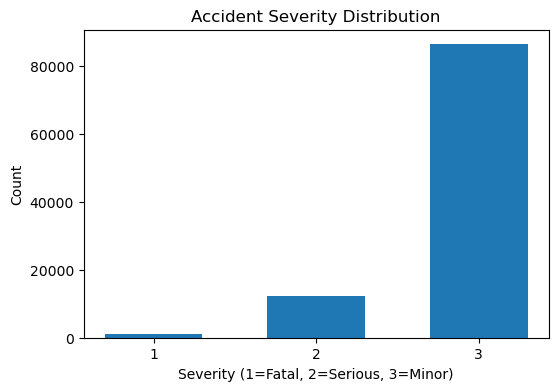

In [49]:
# Implementation
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['Accident_Severity'], bins=[1,2,3,4], align='left', rwidth=0.6)
ax.set_xticks([1,2,3])
ax.set_xlabel("Severity (1=Fatal, 2=Serious, 3=Minor)")
ax.set_ylabel("Count")
ax.set_title("Accident Severity Distribution")

In [57]:
# Save before showing
fig.savefig('01_severity_histogram.png', dpi=150, bbox_inches='tight')
plt.show()

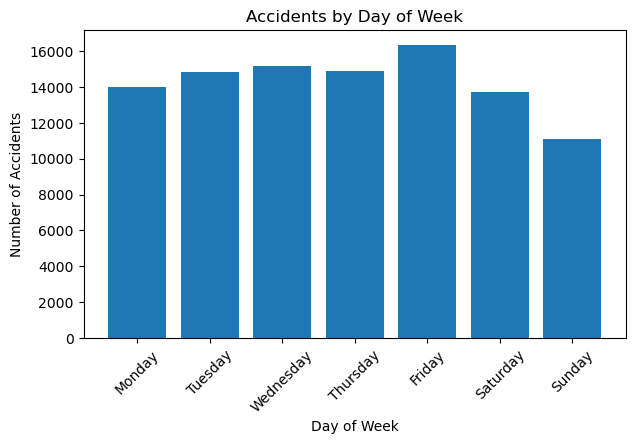

In [59]:
#2. Accidents by Day of Week
#Motivation
#Identify whether weekends or weekdays carry more risk.
# Implementation
counts = df['Day_Name'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
fig, ax = plt.subplots(figsize=(7,4))
ax.bar(counts.index, counts.values)
ax.set_xlabel("Day of Week")
ax.set_ylabel("Number of Accidents")
ax.set_title("Accidents by Day of Week")
plt.xticks(rotation=45)

# Save & show
fig.savefig('02_accidents_by_day.png', dpi=150, bbox_inches='tight')
plt.show()

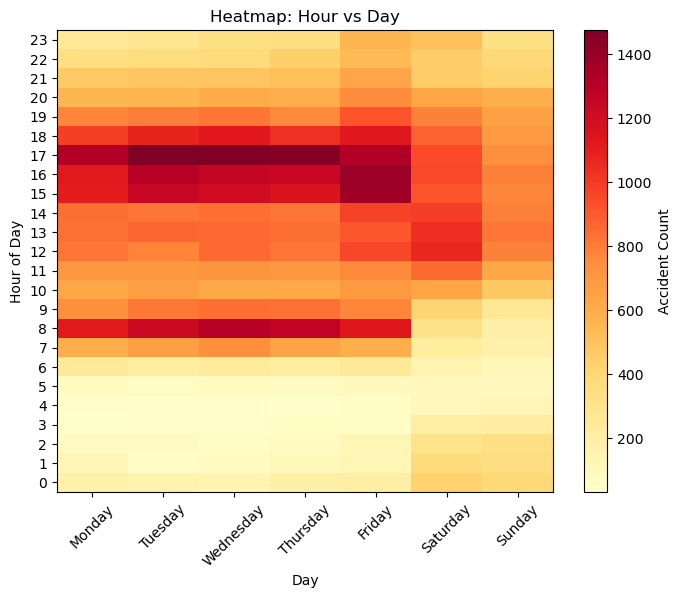

In [61]:
#3. Hour vs. Day Heatmap
#Motivation
#Surface rush-hour hotspots across the week.
import numpy as np

# Implementation
pivot = df.pivot_table(
    index='Hour', columns='Day_Name', 
    values='Accident_Index', aggfunc='count'
).reindex(
    index=range(0,24),
    columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

fig, ax = plt.subplots(figsize=(8,6))
c = ax.pcolormesh(
    np.arange(8), np.arange(25),
    pivot.values, cmap='YlOrRd'
)
ax.set_xlabel("Day")
ax.set_ylabel("Hour of Day")
ax.set_xticks(np.arange(7)+0.5)
ax.set_xticklabels(pivot.columns, rotation=45)
ax.set_yticks(np.arange(24)+0.5)
ax.set_yticklabels(pivot.index)
fig.colorbar(c, ax=ax, label='Accident Count')
ax.set_title("Heatmap: Hour vs Day")

# Save & show
fig.savefig('03_hour_day_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

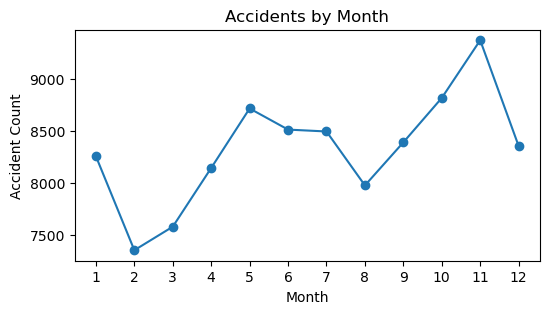

In [63]:
#4. Monthly Trend Line
#Motivation
#Reveal seasonal patterns over the year.
# Implementation
monthly = df['Month'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(monthly.index, monthly.values, marker='o')
ax.set_xlabel("Month")
ax.set_ylabel("Accident Count")
ax.set_title("Accidents by Month")
ax.set_xticks(range(1,13))

# Save & show
fig.savefig('04_monthly_trend.png', dpi=150, bbox_inches='tight')
plt.show()

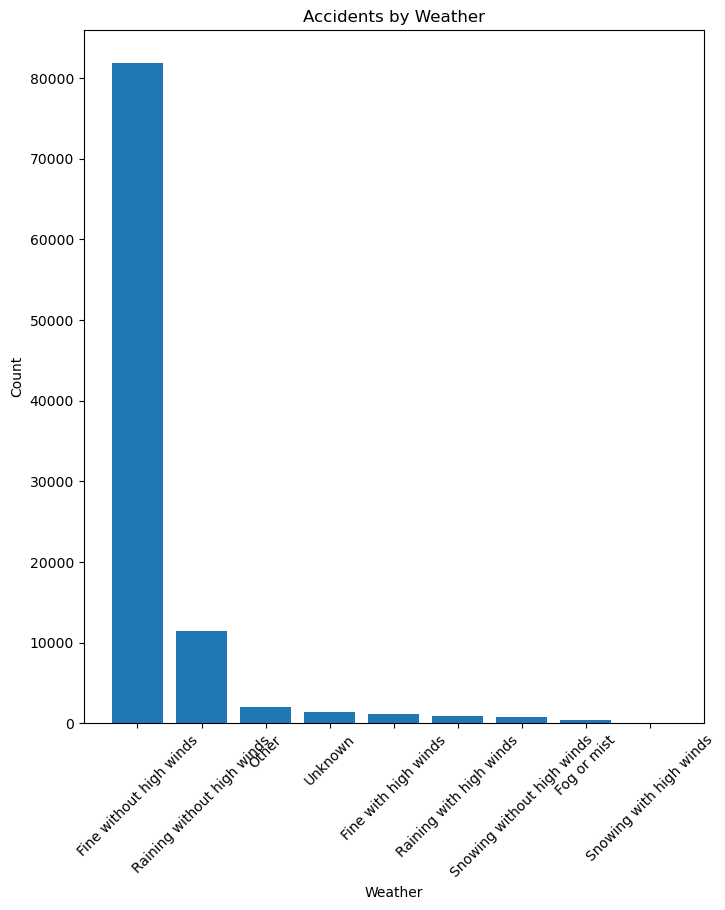

In [71]:
#5. Accidents by Weather
#Motivation
#See which broad weather category is riskiest.
# Implementation
wcounts = df['Weather_Conditions'].value_counts()
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(wcounts.index, wcounts.values)
ax.set_xlabel("Weather")
ax.set_ylabel("Count")
ax.set_title("Accidents by Weather")
plt.xticks(rotation=45)

# Save & show
fig.savefig('05_weather_bar.png', dpi=150, bbox_inches='tight')
plt.show()

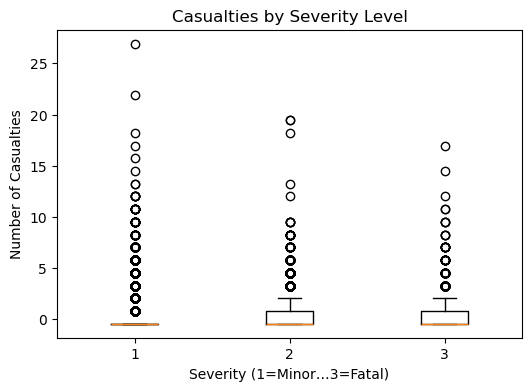

In [73]:
#6. Casualties by Severity Boxplot
#Motivation
#Compare casualty distributions across severity levels.
# Implementation
data = [
    df.loc[df['Severity_Ord']==lvl, 'Number_of_Casualties']
    for lvl in sorted(df['Severity_Ord'].unique())
]
fig, ax = plt.subplots(figsize=(6,4))
ax.boxplot(data, labels=sorted(df['Severity_Ord'].unique()))
ax.set_xlabel("Severity (1=Minor…3=Fatal)")
ax.set_ylabel("Number of Casualties")
ax.set_title("Casualties by Severity Level")

# Save & show
fig.savefig('06_casualties_boxplot.png', dpi=150, bbox_inches='tight')
plt.show()


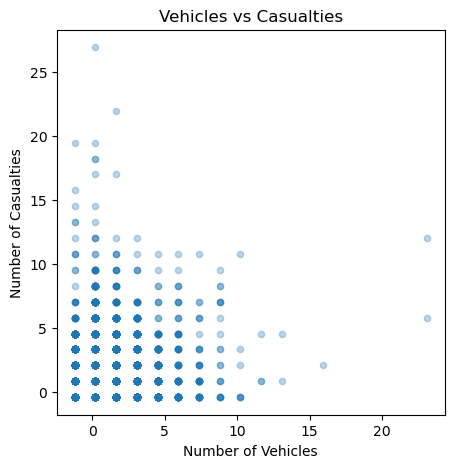

In [83]:
#7. Vehicles vs. Casualties Scatter

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(
    df['Number_of_Vehicles'], 
    df['Number_of_Casualties'], 
    alpha=0.3, s=10
)
ax.set_xlabel("Number of Vehicles")
ax.set_ylabel("Number of Casualties")
ax.set_title("Vehicles vs Casualties")

# Save & show
fig.savefig('07_vehicles_vs_casualties.png', dpi=150, bbox_inches='tight')
plt.show()

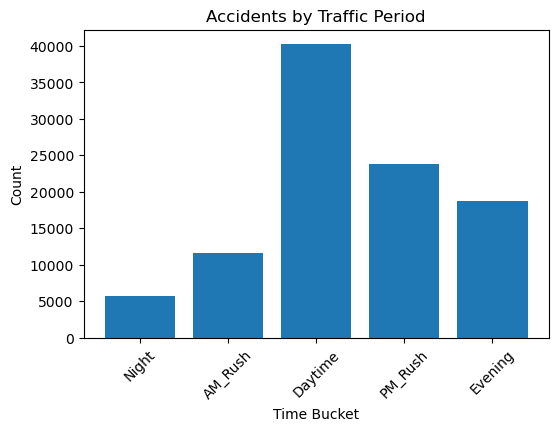

In [77]:
#8. Accidents by Time Bucket
#Motivation
#Compare risk across Night, AM/PM rush, Day, Evening.
# Implementation
tb = df['Time_Bucket'].value_counts().reindex(
    ['Night','AM_Rush','Daytime','PM_Rush','Evening']
)
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(tb.index, tb.values)
ax.set_xlabel("Time Bucket")
ax.set_ylabel("Count")
ax.set_title("Accidents by Traffic Period")
plt.xticks(rotation=45)

# Save & show
fig.savefig('08_time_bucket_bar.png', dpi=150, bbox_inches='tight')
plt.show()

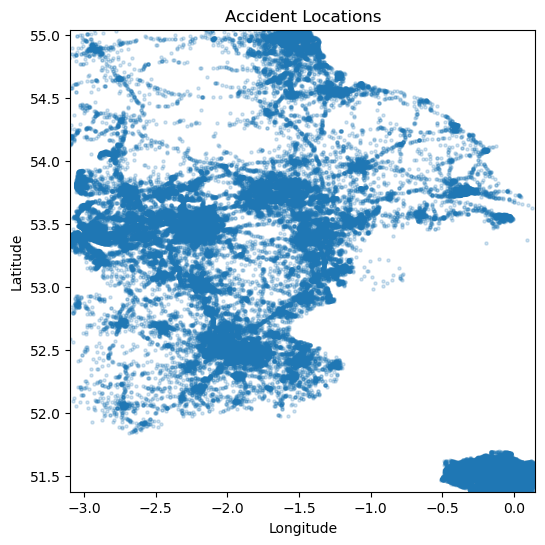

In [79]:
#9. Geospatial Scatter (Hotspots)
#Motivation
#Visualize accident locations to spot clusters spatially.
# Implementation
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(
    df['Longitude'], df['Latitude'], 
    s=5, alpha=0.2
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Accident Locations")
# Optionally tighten to UK bounds:
ax.set_xlim(df['Longitude'].quantile(0.01), df['Longitude'].quantile(0.99))
ax.set_ylim(df['Latitude'].quantile(0.01), df['Latitude'].quantile(0.99))

# Save & show
fig.savefig('09_geo_scatter.png', dpi=150, bbox_inches='tight')
plt.show()

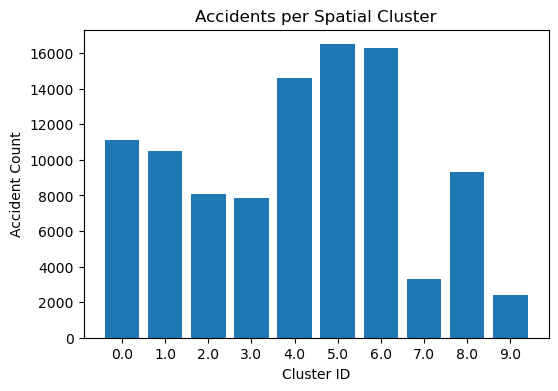

In [81]:
#10. Accidents by Location Cluster
#Motivation
#See which of your K-means–derived clusters are busiest.
# Implementation
lc = df['Location_Cluster'].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(lc.index.astype(str), lc.values)
ax.set_xlabel("Cluster ID")
ax.set_ylabel("Accident Count")
ax.set_title("Accidents per Spatial Cluster")

# Save & show
fig.savefig('10_cluster_counts.png', dpi=150, bbox_inches='tight')
plt.show()

In [92]:
# ML

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load the feature-engineered dataset
file_path = 'first_100k_rows_UK_Accident_feature_engineered.csv'
df = pd.read_csv(file_path)

non_numeric = df.select_dtypes(exclude=[np.number, 'bool']).columns
print("Non-numeric columns still present:", list(non_numeric))

df_model = df.drop(columns=non_numeric)

# 3. Now df_model.columns might include 'Unnamed: 0' but no longer 'Accident_Index'
#    So build a drop list conditional on what actually exists:
to_drop = ['Unnamed: 0', 'Accident_Index', 'Accident_Severity']
to_drop = [c for c in to_drop if c in df_model.columns]


# Prepare features (X) and target (y)
X = df_model.drop(columns=to_drop)
y = df_model['Accident_Severity']

# Split into train and test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define four classifiers
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42)
}

# Train, predict, and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (macro)': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall (macro)': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1-score (macro)': f1_score(y_test, y_pred, average='macro', zero_division=0)
    })

# Create a summary DataFrame of metrics
summary_df = pd.DataFrame(results)

# Print the summary table to the user
print("Model Performance Summary:")
print(summary_df.to_string(index=False))

# Also print detailed classification report for the best-performing model
best = summary_df.sort_values('F1-score (macro)', ascending=False).iloc[0]
best_model_name = best['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
print(f"\nBest Model: {best_model_name}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_best, zero_division=0))

Non-numeric columns still present: ['Accident_Index', 'Date', 'Time', 'Local_Authority_(Highway)', 'Road_Type', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Weather_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location', 'Datetime', 'Day_Name', 'Season', 'Time_Bucket']


C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance Summary:
                 Model  Accuracy  Precision (macro)  Recall (macro)  F1-score (macro)
   Logistic Regression  0.863409           0.287803        0.333333          0.308899
         Random Forest  1.000000           1.000000        1.000000          1.000000
     Gradient Boosting  1.000000           1.000000        1.000000          1.000000
Support Vector Machine  0.863409           0.287803        0.333333          0.308899

Best Model: Random Forest

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       247
           2       1.00      1.00      1.00      2484
           3       1.00      1.00      1.00     17263

    accuracy                           1.00     19994
   macro avg       1.00      1.00      1.00     19994
weighted avg       1.00      1.00      1.00     19994

